<a href="https://colab.research.google.com/github/raza33010/Road-Accident-Predicton-By-Vehicle-Type/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from google.colab import files

import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression



In [ ]:
missing_values=["N/a", "na", np.nan]
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Road Accident Data.csv' , na_values = missing_values)

**1. Data Preprocessing**

In [ ]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [ ]:
df.shape

(307973, 21)

In [ ]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [ ]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


In [ ]:
df.nunique()

Accident_Index                197644
Accident Date                    730
Day_of_Week                        7
Junction_Control                   7
Junction_Detail                    9
Accident_Severity                  4
Latitude                      264362
Light_Conditions                   5
Local_Authority_(District)       422
Carriageway_Hazards                5
Longitude                     269856
Number_of_Casualties              28
Number_of_Vehicles                17
Police_Force                      51
Road_Surface_Conditions            5
Road_Type                          5
Speed_limit                        8
Time                            1439
Urban_or_Rural_Area                2
Weather_Conditions                 8
Vehicle_Type                      15
dtype: int64

In [ ]:
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

# **2.Feature Engineering**

In [ ]:
# Drop Unbalanced columns
df.drop(columns='Carriageway_Hazards', inplace=True)

# Fill missing values with most frequent values
most_freq_surface_conditions = df['Road_Surface_Conditions'].mode()[0]
df['Road_Surface_Conditions'].fillna(most_freq_surface_conditions, inplace=True)

most_freq_road_type = df['Road_Type'].mode()[0]
df['Road_Type'].fillna(most_freq_road_type, inplace=True)

#replace vales in Accident_Severity columns
df['Accident_Severity'].replace('Fetal', 'Fatal', inplace=True)

#drop unwanted columns
df.drop(columns=['Latitude', 'Longitude','Junction_Control','Local_Authority_(District)','Police_Force'], inplace=True)

In [ ]:
# Mapping between Road Surface Conditions and corresponding Weather Conditions to fill the missing values
conditions_mapping = {
    'Dry': 'Fine no high winds',
    'Wet or damp': 'Raining no high winds',
    'Snow': 'Snowing no high winds',
    'Frost or ice': 'Snowing + high winds'
}

df['Weather_Conditions'].fillna(df['Road_Surface_Conditions'].map(conditions_mapping), inplace=True)
df['Weather_Conditions'].fillna('Other', inplace=True)

In [ ]:
# Extract  only the daily hour of each accident
df['Time']= df['Time'].str.split(':').str[0]

# Convert 'Time' column to float
df['Time'] = df['Time'].astype(float)

# Calculate the mean of the 'Time' column
mean_time = df['Time'].mean().round(0)

# Fill missing values in the 'Time' column with the calculated mean
df['Time'].fillna(mean_time, inplace=True)

# Rename Columns name
df = df.rename(columns={'Accident_Severity': 'Accident_Injuries', 'Number_of_Casualties': 'death_toll' , 'Accident_Index': 'Accident_ID' , 'Time':'Hour_of_Accident'})

In [ ]:
# Creating a Pivot Table to analyze number of death values based on 'Accident Date' and 'Hour_of_Accident'
pivot_table = pd.pivot_table(df, values='death_toll', index=[ 'Accident Date'], columns='Hour_of_Accident', fill_value=None).round(0)
pivot_table

Hour_of_Accident,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Accident Date,,,,,,,,,,,,,,,,,,,,,
1/1/2021,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1/1/2022,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
1/10/2021,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1/10/2022,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
1/11/2021,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/7/2022,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
9/8/2021,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
9/8/2022,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
category_mapping = {
    'Car': 'Car',
    'Taxi/Private hire car': 'Taxi',
    'Motorcycle over 500cc': 'Motorcycle',
    'Van / Goods 3.5 tonnes mgw or under': 'Van',
    'Goods over 3.5t. and under 7.5t': 'Other',
    'Motorcycle 125cc and under': 'Motorcycle',
    'Motorcycle 50cc and under': 'Motorcycle',
    'Bus or coach (17 or more pass seats)': 'Bus',
    'Goods 7.5 tonnes mgw and over': 'Other',
    'Other vehicle': 'Other',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    'Agricultural vehicle': 'Other',
    'Minibus (8 - 16 passenger seats)': 'Other',
    'Pedal cycle': 'Pedal cycle',
    'Ridden horse': 'Ridden horse'
}

# Map values in 'Vehicle_Type' column to the specified categories
df['Vehicle_Type'] = df['Vehicle_Type'].map(category_mapping)

df['Vehicle_Type'].unique()

array(['Car', 'Taxi', 'Motorcycle', 'Van', 'Other', 'Bus', 'Pedal cycle',
       'Ridden horse'], dtype=object)

# **3.Exploratory Data Analysis (EDA)**



***Data Visualization***





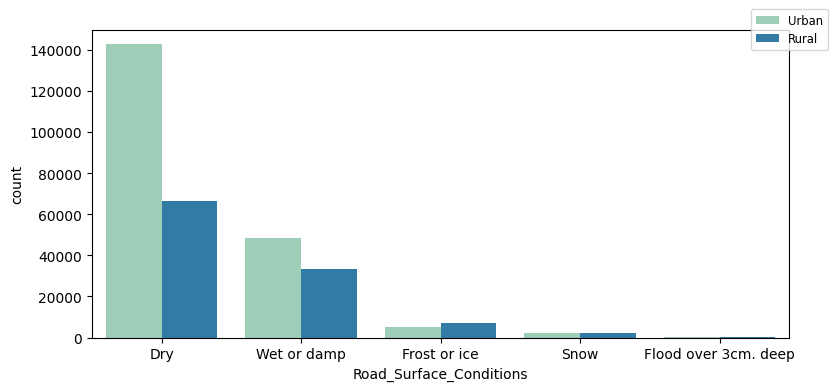

In [ ]:
# Create a figure with a specified size (width=15, height=5)
plt.figure(figsize=(9, 4))

# Create a count plot to visualize the distribution of accidents based on road surface conditions
sns.countplot(data=df, x='Road_Surface_Conditions', palette="YlGnBu", hue='Urban_or_Rural_Area')

# Add a legend to the upper left corner outside the plot area
plt.legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')
plt.show()

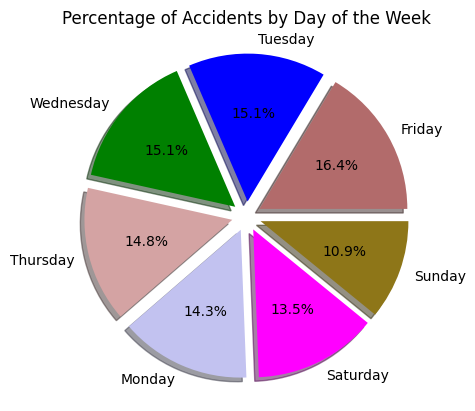

In [ ]:
#make a pie chart to display thee percentage of accident per each day
df['Day_of_Week'].value_counts().plot(kind='pie', autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], shadow=True, colors= ['#B26B6B', '#0000ff', '#008000', '#d4a3a3', '#c2c2f0', '#ff00ff', '#8e7618'])
plt.title('Percentage of Accidents by Day of the Week')
plt.ylabel(' ')
plt.show()

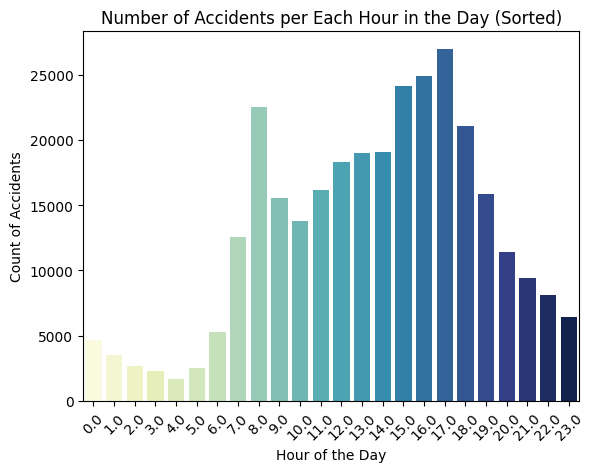

In [ ]:
# Create a Bar plot to display the number of accidents per each hour in the day
df_sorted = df.sort_values(by='Hour_of_Accident')
sns.countplot(data=df_sorted, x='Hour_of_Accident', hue='Hour_of_Accident', palette="YlGnBu", dodge=False, legend=False)
plt.title('Number of Accidents per Each Hour in the Day (Sorted)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Accidents')
plt.xticks(rotation =45)
plt.show()

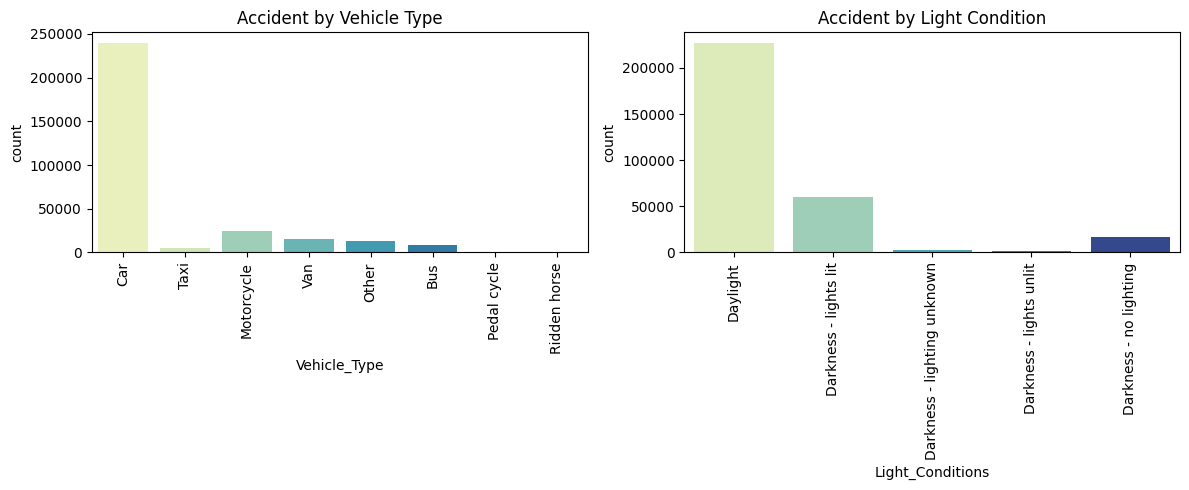

In [ ]:
plt.figure(figsize=(12, 5))

# First subplot: Accident by vehicle type
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Vehicle_Type",  hue="Vehicle_Type", palette="YlGnBu", dodge=False, legend=False)
plt.title('Accident by Vehicle Type')
plt.xticks(rotation=90)

# Second subplot: Accident by light condition
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Light_Conditions",hue="Light_Conditions", palette="YlGnBu", dodge=False, legend=False)
plt.title('Accident by Light Condition')
plt.xticks(rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()


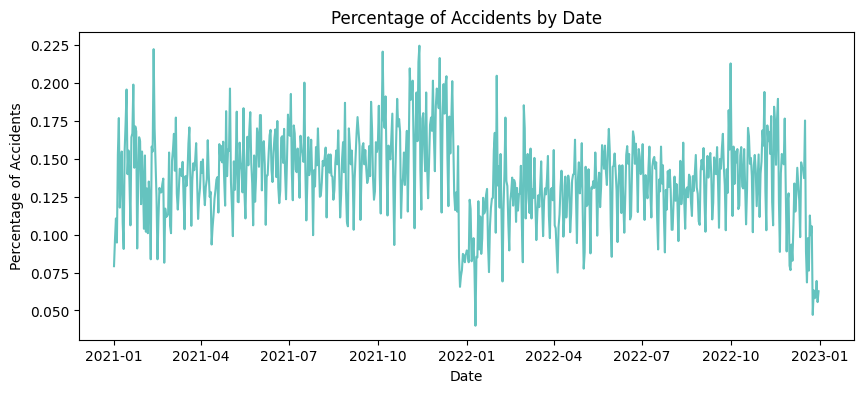

In [ ]:
# Create a line chart to calculate the percentage of accidents for each date
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
date_counts = df['Accident Date'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 4))
sns.lineplot(x=date_counts.index, y=date_counts.values, color=sns.color_palette("YlGnBu")[2])
plt.title('Percentage of Accidents by Date')
plt.xlabel('Date')
plt.ylabel('Percentage of Accidents')
plt.show()

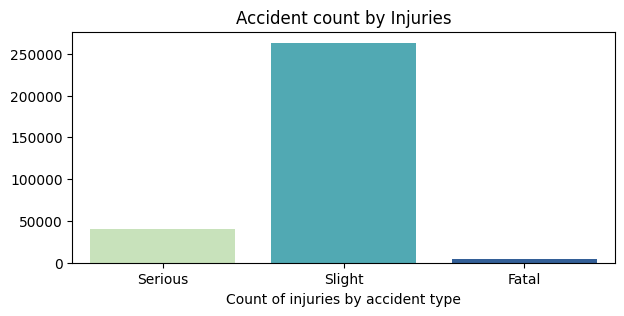

In [ ]:
# Create a count plot to show the number of accident by Accident_Severity
plt.figure(figsize=(7,3))
sns.countplot(data = df, x='Accident_Injuries', hue = 'Accident_Injuries' ,palette ='YlGnBu', dodge=False, legend=False )
plt.title('Accident count by Injuries')
plt.xlabel('Count of injuries by accident type')
plt.ylabel('')
plt.show()

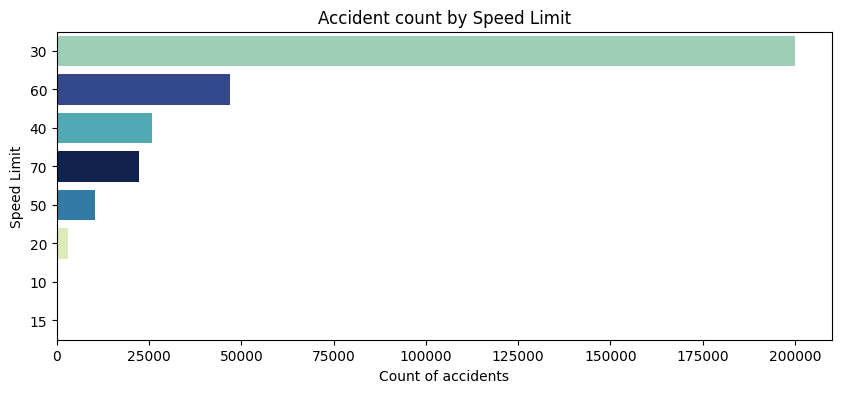

In [ ]:
# Bar plot to show what is the most common accident speed limit
plt.figure(figsize = (10,4))
sns.countplot(data=df, y='Speed_limit', hue= 'Speed_limit', order=df['Speed_limit'].value_counts().index, palette='YlGnBu', dodge=False, legend=False )
plt.title('Accident count by Speed Limit')
plt.xlabel('Count of accidents')
plt.ylabel('Speed Limit')
plt.show()

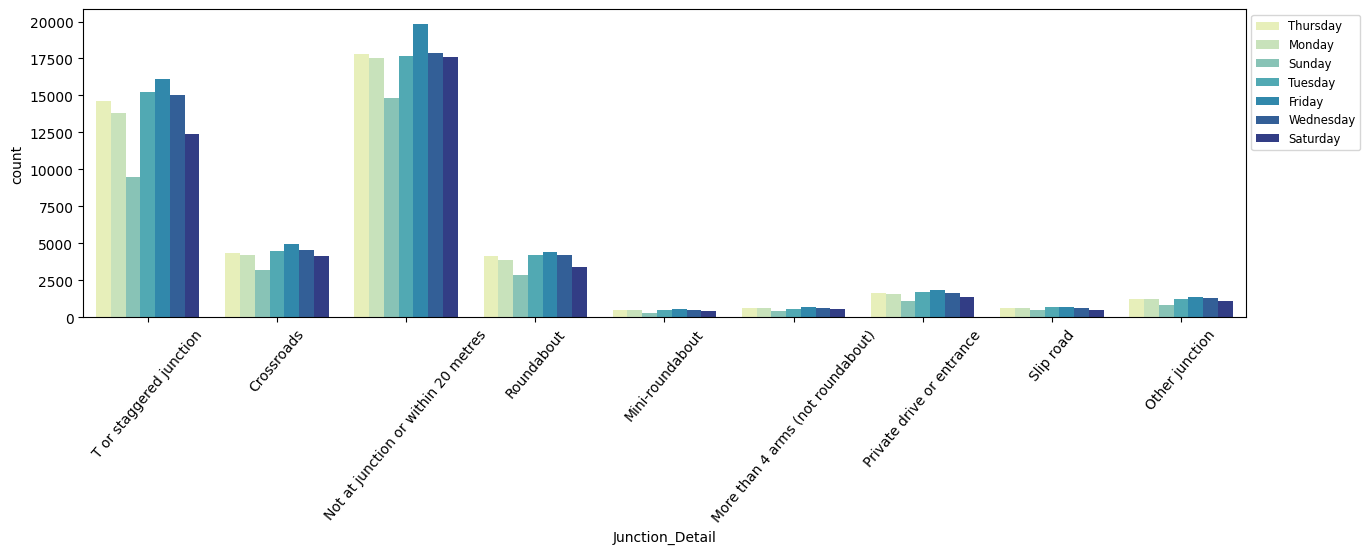

In [ ]:
# Count of accident by junction details for each day in the week
plt.figure(figsize=(15,4))
sns.countplot(data=df, x= 'Junction_Detail' ,palette="YlGnBu", hue='Day_of_Week')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize='small')
plt.xticks(rotation = 50)
plt.show()

In [ ]:
df.to_csv('Accident_Dataset.csv', index=False)

In [ ]:
files.download('Accident_Dataset.csv')

# **Model Building**

In [ ]:

# Drop columns that are not suitable for training (like identifiers or non-numeric columns)
df.drop(['Accident_ID', 'Accident Date'], axis=1, inplace=True)

# Identify columns with object data type (usually categorical)
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
object_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", object_columns)

# Initialize LabelEncoder for categorical columns
label_encoders = {}
for column in object_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# # Separate features and target variable
X = df.drop('Vehicle_Type', axis=1)
y = df['Vehicle_Type']


Categorical columns: Index(['Day_of_Week', 'Junction_Detail', 'Accident_Injuries',
       'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')


**LINEAR REGRESSION**

**DECISION TREE**


WITH PYTHON PACKAGE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.69
Confusion Matrix:
[[   41  1575    70    36     0    16    37]
 [ 1044 42403  1895   955     4   442  1172]
 [   97  4464   190   105     0    34   120]
 [   57  2343   108    46     0    23    51]
 [    0    13     0     0     0     0     1]
 [   18  1001    49    22     0     8    28]
 [   69  2729   143    76     0    29    81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.02      0.03      1775
           1       0.78      0.88      0.83     47915
           2       0.08      0.04      0.05      5010
           3       0.04      0.02      0.02      2628
           4       0.00      0.00      0.00        14
           6       0.01      0.01      0.01      1126
           7       0.05      0.03      0.04      3127

    accuracy                           0.69     61595
   macro avg       0.14      0.14      0.14     61595
weighted avg       0.62      0.69      0.65     61595



WITHOUT PYTHON PACKAGE

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        self.n_features = X.shape[1]
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples_per_class = [np.sum(y == i) for i in range(self.n_classes)]
        predicted_class = np.argmax(n_samples_per_class)
        node = {'predicted_class': predicted_class}

        if depth < self.max_depth:
            feat, thresh = self._best_split(X, y)
            if feat is not None:
                indices_left = X[:, feat] < thresh
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node['split_feature'] = feat
                node['threshold'] = thresh
                node['left'] = self._grow_tree(X_left, y_left, depth + 1)
                node['right'] = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes)]
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_feat, best_thresh = None, None

        for feat in range(self.n_features):
            thresholds, classes = zip(*sorted(zip(X[:, feat], y)))
            num_left = [0] * self.n_classes
            num_right = num_parent.copy()

            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m

                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_feat = feat
                    best_thresh = (thresholds[i] + thresholds[i - 1]) / 2
        return best_feat, best_thresh

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])

    def _predict_one(self, x, tree):
        if 'predicted_class' in tree:
            return tree['predicted_class']
        else:
            split_feat = tree['split_feature']
            threshold = tree['threshold']
            if x[split_feat] < threshold:
                return self._predict_one(x, tree['left'])
            else:
                return self._predict_one(x, tree['right'])



**LOGISTIC REGRESSION**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))



Accuracy: 0.69
Confusion Matrix:
[[   41  1575    70    36     0    16    37]
 [ 1044 42403  1895   955     4   442  1172]
 [   97  4464   190   105     0    34   120]
 [   57  2343   108    46     0    23    51]
 [    0    13     0     0     0     0     1]
 [   18  1001    49    22     0     8    28]
 [   69  2729   143    76     0    29    81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.02      0.03      1775
           1       0.78      0.88      0.83     47915
           2       0.08      0.04      0.05      5010
           3       0.04      0.02      0.02      2628
           4       0.00      0.00      0.00        14
           6       0.01      0.01      0.01      1126
           7       0.05      0.03      0.04      3127

    accuracy                           0.69     61595
   macro avg       0.14      0.14      0.14     61595
weighted avg       0.62      0.69      0.65     61595

